In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Agenda**

*   What is **Linear Regression**
*   How to use **pandas library** to read data
*   How to use **matplotlib library** to visualize data
*   How to train and evalute Linear Regression Model in sklearn



# A "Hello World" Linear Regression


**Linear Regression**

$y = \beta + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$
 
  \theta :  Mức quan trọng của x đối với y


## Chuẩn bị dữ liệu

**Tạo dữ liệu**


In [ ]:
import numpy as np
# Set random seed to make sure the random result is replicable
np.random.seed(42)
# Random from the “standard normal” distribution
x = np.random.randn(2000,1)
# Random noise
noise = np.random.randn(2000,1)
y = 3*x + noise + 2
y_without_noise = 3*x + 2
print(y.shape)

(2000, 1)


## Data Visualization

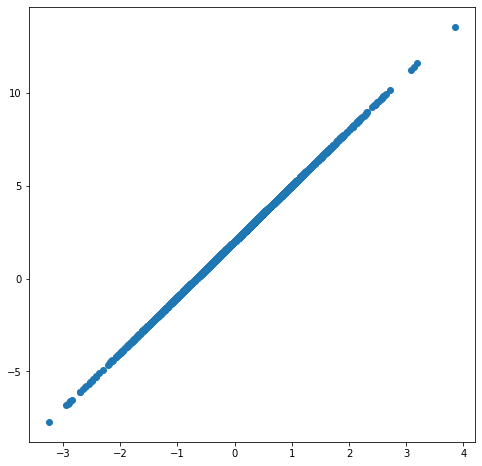

In [ ]:
import matplotlib.pyplot as plt

# Visualize data without noise
plt.figure(figsize=(8,8))
plt.scatter(x, y_without_noise)

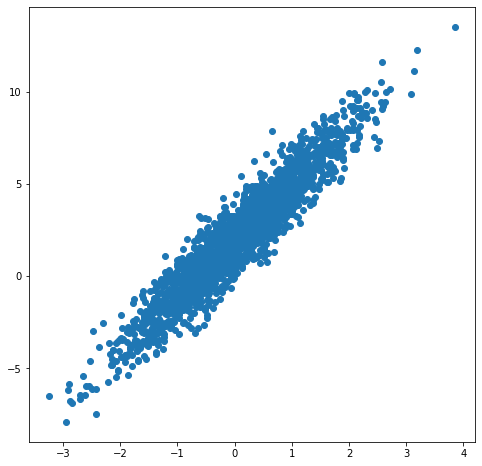

In [ ]:
# Visualize data with noise
plt.figure(figsize=(8,8))
plt.scatter(x, y)

Điều quan trọng nhất khi làm việc với dữ liệu đó là ta cần ghi nhớ "hình dáng / cấu trúc / kích thước / shape" của dữ liệu

In [ ]:
# TODO
# print out the shape of x and y
print('Shape of x:',x.shape)
print('Shape of y:',y.shape)

Shape of x: (2000, 1)
Shape of y: (2000, 1)


## Chia dữ liệu thành bộ Train và bộ Test

Tiếp theo ta dùng hàm ``train_test_split`` của thư viện sklearn để tách x, y thành bộ train và test

**Mã giả**
```
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42
```

Trong đó:
- ``x`` là dữ liệu ban đầu
- ``y`` là bộ nhãn ban đầu
- ``test_size=0.2``: chia dữ liệu theo tỉ lệ 80% train và 20% test
- ``shuffle=True``: trộn dữ liệu lên trước rồi mới tiến hành chia
- ``random_state=42``: tương tự ``random.seed``

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [ ]:
# TODO
# Print out the shape of train set and test set
print('Shape of x_train: {}'.format(x_train.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of x_test: {}'.format(x_test.shape))
print('Shape of y_test: {}'.format(y_test.shape))

Shape of x_train: (1600, 1)
Shape of y_train: (1600, 1)
Shape of x_test: (400, 1)
Shape of y_test: (400, 1)


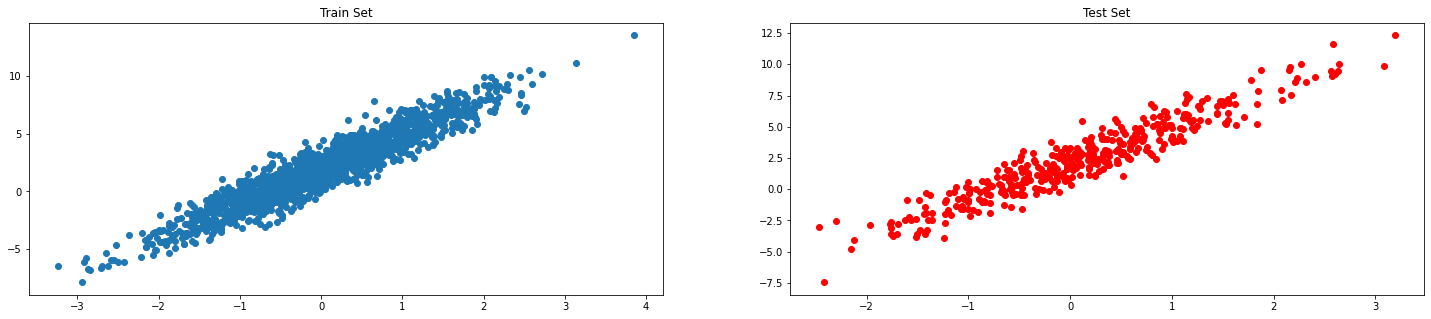

In [ ]:
#figsize = (chieu rong, chieu cao)
fig, ax = plt.subplots(1, 2, figsize=(25,5)) # 1 row 2 columns
ax[0].scatter(x=x_train, y=y_train)
ax[0].set_title('Train Set')
ax[1].scatter(x=x_test, y=y_test, c='red')
ax[1].set_title('Test Set')
plt.show()

## Xây dựng mô hình Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# make an instance of LinearRegression
# Định nghĩa không gian hàm
model = LinearRegression()


**Huấn luyện mô hình**

In [ ]:
# fit the model to the training data (learn the coefficients)
model.fit(x_train, y_train)
# fit_intercept : Có tìm b không
# n_jobs : xài bao nhiêu core của CPU (-1 :all)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Đánh giá mô hình sau khi huấn luyện


**Lấy ra bộ trọng số đã được huấn luyện**

In [ ]:
# print the intercept and coefficients
print('Bias:',model.intercept_)
print('Weight:',model.coef_)
# Mảng 1 chiều []
# Mảng 2 chiều [[]]

Bias: [1.96695692]
Weight: [[2.9958129]]


In [ ]:
w = model.coef_[0][0]
b = model.intercept_[0]

y_pred = w * x_test + b
y_model = model.predict(x_test)
print(y_pred.shape)
print(y_model.shape)
print(np.where(y_pred == y_model)[0].shape)

(400, 1)
(400, 1)
(400,)


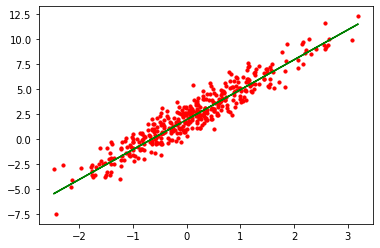

In [ ]:
plt.scatter(x_test, y_test, s=10, c='red')
plt.plot(x_test, y_pred, c='green')
plt.show()

**Mean Absolute Error**
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


*   $\hat{y}_i$ is the predicted value of $x_i$
*   $y_i$ is the true value of $x_i$



In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
print('Mean Absolute Error on Test Set:', MAE(y_test,y_pred))

Mean Absolute Error on Test Set: 0.7912447800560788


**Mean Squared Error**
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

*   $\hat{y}_i$ is the predicted value of $x_i$
*   $y_i$ is the true value of $x_i$

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
print('Mean Squared Error on Test Set:', MSE(y_test, y_pred))

Mean Squared Error on Test Set: 0.9756676069341212


# Excercise: Apply Linear Regression for Advertising Dataset

**DATASET LINK** https://drive.google.com/file/d/1uDYppdqmzVGQ6SK55pB1vO8cNJ_vR3Ls/view?usp=sharing

Xóa toàn bộ các biến và thư viện đã import 

In [ ]:
%reset -f

## Đọc dữ liệu từ file CSV

In [ ]:
# TODO
# Create a path variable to where you saved csv file
from google.colab import drive
drive.mount('/content/drive')
# mount từ gg drive
PATH_TO_CSV = '/content/drive/My Drive/Colab Notebooks/Advertising.csv'

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv(PATH_TO_CSV, index_col=0)

In [ ]:
import os
os.listdir('/content/drive/My Drive/Colab Notebooks')

['Advertising.csv',
 'Test1.ipynb',
 'pandas.ipynb',
 'LinearRegressionDataSquare.ipynb',
 'HandWritingDigitRecognization.ipynb',
 'ex1_numpy.ipynb',
 'KNN (1).ipynb',
 'K_means_clustering.ipynb',
 'LinearRegressionDataLinear.ipynb',
 'LogisticRegression.ipynb',
 'SoftmaxRegression.ipynb',
 'KNN.ipynb',
 'KmeansClustering.ipynb',
 'NhanDangChuVietTay.ipynb',
 'clothesMNIST.ipynb',
 'NeuralNetwork.ipynb',
 'CNN.ipynb',
 'BuildCNNfromScrath.ipynb',
 'Practice VTCA-BT1.ipynb',
 'S1_Assignment_HoangDuyLoc.ipynb',
 'Untitled',
 'VTCA-BT1.ipynb']

In [ ]:
# TODO
# Try to print out the shape of out data
print('Shape of data:',data.shape)

Shape of data: (200, 4)


**Xem thử 5 dòng đầu của dữ liệu**

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Ý nghĩa của các features trong bộ dữ liệu (đơn vị: ngàn đô la)

- **TV:** Tổng số tiền đã chi để quảng cáo trên TV 
- **Radio:** Tổng số tiền đã chi để quảng cáo trên Radio
- **Newspaper:** Tổng số tiền đã chi để quảng cáo trên Báo

Ý nghĩa của kết quả đầu ra
- **Sales:** số lượng sản phẩm bán được (đơn vị: ngàn)

## Lấy ra x, y từ Dataframe trên

### TODO

Tạo 2 biến:
- feature_col_name: 
  - Kiểu dữ liệu: **list**
  - Chứa tên các đặc trưng trong bộ dữ liệu
- output_col_name:
  - Kiểu dữ liệu: **string**
  - Chứa tên của cột kết quả

In [ ]:
feature_col_name = ['TV', 'Radio', 'Newspaper']
output_col_name = 'Sales'
print(feature_col_name)
print(output_col_name)

['TV', 'Radio', 'Newspaper']
Sales


Câu lệnh
```
X = data[feature_col_name].values
```
gồm 2 phần:
- ``data[feature_col_name]`` lọc Dataframe theo các cột có trong biến ``feature_col_name``
- ``.values`` chuyển đổi dữ liệu về dạng numpy array

In [ ]:

X = data[feature_col_name].values
# print(X)
y = data[output_col_name].values
print('Shape of X:',X.shape)
print('Shape of y:',y.shape)
print(y)

Shape of X: (200, 3)
Shape of y: (200,)
[22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2  4.8 10.6  8.6 17.4  9.2  9.7
 19.  22.4 12.5 24.4 11.3 14.6 18.  12.5  5.6 15.5  9.7 12.  15.  15.9
 18.9 10.5 21.4 11.9  9.6 17.4  9.5 12.8 25.4 14.7 10.1 21.5 16.6 17.1
 20.7 12.9  8.5 14.9 10.6 23.2 14.8  9.7 11.4 10.7 22.6 21.2 20.2 23.7
  5.5 13.2 23.8 18.4  8.1 24.2 15.7 14.  18.   9.3  9.5 13.4 18.9 22.3
 18.3 12.4  8.8 11.  17.   8.7  6.9 14.2  5.3 11.  11.8 12.3 11.3 13.6
 21.7 15.2 12.  16.  12.9 16.7 11.2  7.3 19.4 22.2 11.5 16.9 11.7 15.5
 25.4 17.2 11.7 23.8 14.8 14.7 20.7 19.2  7.2  8.7  5.3 19.8 13.4 21.8
 14.1 15.9 14.6 12.6 12.2  9.4 15.9  6.6 15.5  7.  11.6 15.2 19.7 10.6
  6.6  8.8 24.7  9.7  1.6 12.7  5.7 19.6 10.8 11.6  9.5 20.8  9.6 20.7
 10.9 19.2 20.1 10.4 11.4 10.3 13.2 25.4 10.9 10.1 16.1 11.6 16.6 19.
 15.6  3.2 15.3 10.1  7.3 12.9 14.4 13.3 14.9 18.  11.9 11.9  8.  12.2
 17.1 15.   8.4 14.5  7.6 11.7 11.5 27.  20.2 11.7 11.8 12.6 10.5 12.2
  8.7 26.2 17.6 22.6 10.3 17.3 15.9  6

## Chia dữ liệu thành bộ Train và bộ Test


### TODO
- Import hàm cần thiết cho việc chia data
- Chia x, y thành bộ Train và bộ Test
- **Lưu ý** dùng random_state=42
- Kiểm tra shape của các biến đầu ra



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

## Xây dựng và huấn luyện mô hình Linear Regression

### TODO
1. Tạo mô hình Linear Regression (đặt tên biến là ``model``)
3. Huấn luyện mô hình trên tập dữ liệu Train

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Đánh giá mô hình 

### TODO
- Dùng mô hình đã huấn luyện để dự đoán kết quả trên dữ liệu Test
- Đánh giá độ hiệu quả của mô hình dựa vào 2 thang đo **Mean Absolute Error** và **Mean Squared Error**

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error as MSE
print('Mean Squared Error on Test Set:', MSE(y_test, y_pred))
from sklearn.metrics import mean_absolute_error as MAE
print('Mean Squared Error on Test Set:', MAE(y_test, y_pred))

Mean Squared Error on Test Set: 3.174097353976105
Mean Squared Error on Test Set: 1.46075671681176


**Giải thích kết quả**

Bias: 2.979067338122631 
Weight: [0.04472952 0.18919505 0.00276111]


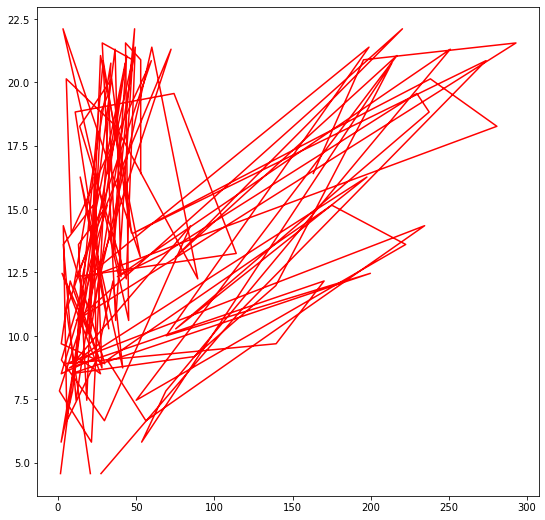

In [ ]:
# TODOs:
# 1. In ra bộ trọng số của mô hình
import matplotlib.pyplot as plt
print("Bias: {} ".format(model.intercept_))
print('Weight: {}'.format(model.coef_))
plt.figure(figsize = (9,9))
plt.plot(X_test,y_pred, c="red")
plt.show()

$$y = 2.97 + 0.0447 \times TV + 0.189 \times Radio +0.0027 \times Newspaper$$


Trọng số 0.0447 của **TV** có thể được hiểu là:
- Fix cứng lượng tiền chi cho Radio và Báo, cứ mỗi 1000$ chi cho quảng cáo trên TV sẽ tăng lượng sản phẩm bán được thêm 44 cái
